In [1]:
import pandas as pd 

from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
# import negative emotion labeled ads
df = pd.read_csv('./data/negative_emotion_dataset.csv').drop(columns= ['Unnamed: 0'])
df

,ad,neg_emo
0,x match your matching gift now will support hu...,1
1,volcán de fuego relief project we are sharing ...,1
2,stand with sharice gtgt republicans to drop a ...,1
3,a dedicated leader with proven experience and ...,1
4,years of obstruction corruption and failed le...,1
...,...,...
23995,oregon the top us producer of christmas trees ...,0
23996,the real winners when we invest in natgas and ...,0
23997,congresswoman mimi walters helped add almost ...,0
23998,trump brags that the economy is booming but s...,0


In [3]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['neg_emo'], test_size =0.2, random_state=42)

In [4]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.790
              precision    recall  f1-score   support

      no-neg       0.88      0.67      0.76      2409
         neg       0.73      0.91      0.81      2391

    accuracy                           0.79      4800
   macro avg       0.81      0.79      0.79      4800
weighted avg       0.81      0.79      0.79      4800

confusion matrix:
[[1620  789]
 [ 218 2173]]



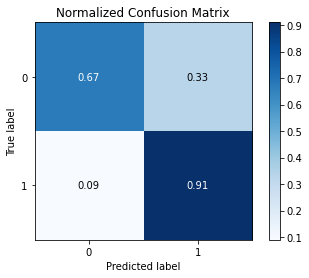

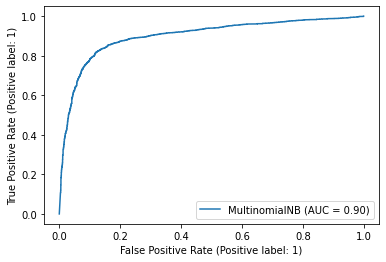

In [6]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no-neg', 'neg']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [10]:
df_val = pd.read_csv('./data/sample_negative_emotion_clean.csv', index_col=0)
df_val

,ad,neg_emo
0,see why everyone is celebrating at hoblit dodg...,0
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,0
3,we have until march st to raise money for our ...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
195,ukraine needs your support\r\nany donation you...,0
196,help odessa help ukraine\r\nyour donations go ...,0
197,hundreds have been killed and scores more infl...,1
198,end of month is tomorrow less than hours to ...,0


accuracy:   0.725
              precision    recall  f1-score   support

  no-neg_emo       0.98      0.46      0.63       100
     neg_emo       0.65      0.99      0.78       100

    accuracy                           0.73       200
   macro avg       0.81      0.72      0.70       200
weighted avg       0.81      0.72      0.70       200

confusion matrix:
[[46 54]
 [ 1 99]]



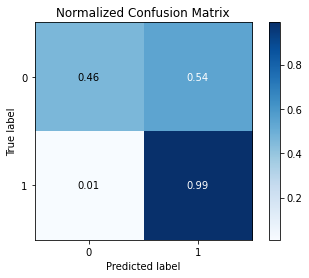

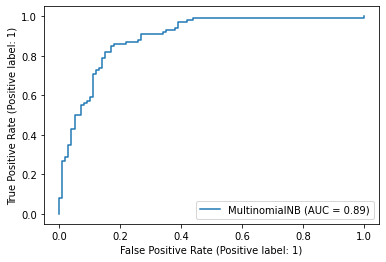

In [11]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['neg_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-neg_emo', 'neg_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)